In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%ls
%cd drive/MyDrive/Colab \Notebooks/EECS595/FinalProj

drive/  sample_data/
/content/drive/MyDrive/Colab Notebooks/EECS595/FinalProj


In [ ]:
!pip install torch torchvision nltk


In [ ]:

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

from nltk.tokenize import word_tokenize

text = "This is a test sentence for tokenization."
tokens = word_tokenize(text)
print(tokens)  # Expected: ['This', 'is', 'a', 'test', 'sentence', 'for', 'tokenization', '.']


['This', 'is', 'a', 'test', 'sentence', 'for', 'tokenization', '.']


In [ ]:
import json
import nltk
from collections import defaultdict

nltk.download('punkt')

# Load the data
with open('ConvEnt_train_resplit.json', 'r') as f:
    data = json.load(f)

# Build vocabulary and tokenize
vocab = defaultdict(lambda: len(vocab))  # Default dict for auto-incrementing IDs
vocab['<PAD>'] = 0  # Padding token
vocab['<UNK>'] = 1  # Unknown token

# Original tokenize_and_index function (used during training data preprocessing)
def tokenize_and_index(text):
    words = nltk.word_tokenize(text.lower())
    return [vocab[word] for word in words]  # This adds new words to vocab



def pad_or_truncate(sequence, max_length):
    if len(sequence) > max_length:
        return sequence[:max_length]
    else:
        return sequence + [0] * (max_length - len(sequence))

def preprocess_data_with_hierarchy(data, max_turns, max_sentences, max_seq_len):
    processed = []
    for entry in data:
        turns = []
        for turn in entry['turns'][:max_turns]:  # Limit to max_turns
            sentences = nltk.sent_tokenize(turn['text'])[:max_sentences]  # Sentence tokenization
            processed_sentences = [
                pad_or_truncate(tokenize_and_index(sentence), max_seq_len) for sentence in sentences
            ]
            if len(processed_sentences) < max_sentences:
                # Pad missing sentences
                processed_sentences += [[0] * max_seq_len] * (max_sentences - len(processed_sentences))
            turns.append(processed_sentences)

        if len(turns) < max_turns:
            # Pad missing turns
            turns += [[[0] * max_seq_len] * max_sentences] * (max_turns - len(turns))

        hypothesis = pad_or_truncate(tokenize_and_index(entry['hypothesis']), max_seq_len)
        label = entry['label']
        processed.append({'turns': turns, 'hypothesis': hypothesis, 'label': label})
    return processed

# Preprocessing parameters
max_turns = 5
max_sentences = 5
max_seq_len = 25

# Process the data
processed_data = preprocess_data_with_hierarchy(data, max_turns, max_sentences, max_seq_len)
vocab = dict(vocab)
# Example: Inspect the first preprocessed sample
print(processed_data[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'turns': [[[2, 3, 4, 3, 5, 6, 3, 7, 3, 8, 3, 6, 9, 3, 9, 6, 10, 11, 12, 13, 14, 15, 16, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[17, 3, 18, 19, 20, 21, 22, 12, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [18, 3, 8, 3, 20, 21, 24, 25, 26, 27, 28, 3, 28, 29, 30, 3, 31, 3, 18, 3, 18, 32, 21, 33, 34], [45, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[46, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(processed_data[0])

{'turns': [[[2, 3, 4, 3, 5, 6, 3, 7, 3, 8, 3, 6, 9, 3, 9, 6, 10, 11, 12, 13, 14, 15, 16, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[17, 3, 18, 19, 20, 21, 22, 12, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [18, 3, 8, 3, 20, 21, 24, 25, 26, 27, 28, 3, 28, 29, 30, 3, 31, 3, 18, 3, 18, 32, 21, 33, 34], [45, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[46, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sample = processed_data[0]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class WordAttention(nn.Module):
    def __init__(self, embedding_dim, hidden_size):
        super(WordAttention, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_size, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_size, 2 * hidden_size)
        self.context_vector = nn.Parameter(torch.randn(2 * hidden_size))

    def forward(self, x):
        # x: [batch_size, seq_len, embedding_dim]
        h, _ = self.gru(x)  # h: [batch_size, seq_len, 2*hidden_size]
        u = torch.tanh(self.fc(h))  # u: [batch_size, seq_len, 2*hidden_size]
        attn_weights = torch.softmax(torch.matmul(u, self.context_vector), dim=1)  # [batch_size, seq_len]
        s = torch.sum(h * attn_weights.unsqueeze(-1), dim=1)  # [batch_size, 2*hidden_size]
        return s, attn_weights

class SentenceAttention(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SentenceAttention, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_size, 2 * hidden_size)
        self.context_vector = nn.Parameter(torch.randn(2 * hidden_size))

    def forward(self, x):
        # x: [batch_size, num_sentences, 2*word_hidden_size]
        h, _ = self.gru(x)  # h: [batch_size, num_sentences, 2*hidden_size]
        u = torch.tanh(self.fc(h))  # u: [batch_size, num_sentences, 2*hidden_size]
        attn_weights = torch.softmax(torch.matmul(u, self.context_vector), dim=1)  # [batch_size, num_sentences]
        s = torch.sum(h * attn_weights.unsqueeze(-1), dim=1)  # [batch_size, 2*hidden_size]
        return s, attn_weights

class TurnAttention(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(TurnAttention, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_size, 2 * hidden_size)
        self.context_vector = nn.Parameter(torch.randn(2 * hidden_size))

    def forward(self, x):
        # x: [batch_size, num_turns, 2*sent_hidden_size]
        h, _ = self.gru(x)  # h: [batch_size, num_turns, 2*hidden_size]
        u = torch.tanh(self.fc(h))  # u: [batch_size, num_turns, 2*hidden_size]
        attn_weights = torch.softmax(torch.matmul(u, self.context_vector), dim=1)  # [batch_size, num_turns]
        s = torch.sum(h * attn_weights.unsqueeze(-1), dim=1)  # [batch_size, 2*hidden_size]
        return s, attn_weights

class HANModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, word_hidden_size, sent_hidden_size, turn_hidden_size, num_classes):
        super(HANModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.word_attn = WordAttention(embedding_dim, word_hidden_size)
        self.sent_attn = SentenceAttention(2 * word_hidden_size, sent_hidden_size)
        self.turn_attn = TurnAttention(2 * sent_hidden_size, turn_hidden_size)
        self.hypo_word_attn = WordAttention(embedding_dim, word_hidden_size)
        self.fc1 = nn.Linear(4 * 2 * turn_hidden_size, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, convo_inputs, hypo_inputs):
        # convo_inputs: [batch_size, num_turns, num_sentences, seq_len]
        # hypo_inputs: [batch_size, seq_len]
        batch_size, num_turns, num_sentences, seq_len = convo_inputs.size()

        # Word-level attention
        convo_inputs = convo_inputs.view(-1, seq_len)  # Flatten: [batch_size*num_turns*num_sentences, seq_len]
        convo_embedded = self.embedding(convo_inputs)  # [batch_size*num_turns*num_sentences, seq_len, embedding_dim]
        sent_reps, _ = self.word_attn(convo_embedded)  # [batch_size*num_turns*num_sentences, 2*word_hidden_size]
        sent_reps = sent_reps.view(batch_size * num_turns, num_sentences, -1)  # [batch_size*num_turns, num_sentences, 2*word_hidden_size]

        # Sentence-level attention
        turn_reps, _ = self.sent_attn(sent_reps)  # [batch_size*num_turns, 2*sent_hidden_size]
        turn_reps = turn_reps.view(batch_size, num_turns, -1)  # [batch_size, num_turns, 2*sent_hidden_size]

        # Turn-level attention
        convo_rep, _ = self.turn_attn(turn_reps)  # [batch_size, 2*turn_hidden_size]

        # Hypothesis processing
        hypo_embedded = self.embedding(hypo_inputs)  # [batch_size, seq_len, embedding_dim]
        hypo_rep, _ = self.hypo_word_attn(hypo_embedded)  # [batch_size, 2*word_hidden_size]

        # Combine representations
        combined = torch.cat([convo_rep, hypo_rep, torch.abs(convo_rep - hypo_rep), convo_rep * hypo_rep], dim=1)
        # Fully connected layers
        out = F.relu(self.fc1(combined))
        logits = self.fc2(out)
        return logits


In [ ]:
from torch.utils.data import Dataset

class ConversationDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        return {
            'turns': torch.tensor(sample['turns'], dtype=torch.long),
            'hypothesis': torch.tensor(sample['hypothesis'], dtype=torch.long),
            'label': torch.tensor(sample['label'], dtype=torch.long)
        }

# Create dataset
dataset = ConversationDataset(processed_data)


In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Model parameters
vocab_size = len(vocab)
embedding_dim = 300
word_hidden_size = 50
sent_hidden_size = 50
turn_hidden_size = 50
num_classes = 2

# Initialize model, loss, and optimizer
model = HANModel(vocab_size, embedding_dim, word_hidden_size, sent_hidden_size, turn_hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in dataloader:
        turns, hypothesis, labels = batch['turns'], batch['hypothesis'], batch['label']
        optimizer.zero_grad()
        outputs = model(turns, hypothesis)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update model parameters
        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 13.2728
Epoch 2/10, Loss: 12.2628
Epoch 3/10, Loss: 9.5137
Epoch 4/10, Loss: 7.3263
Epoch 5/10, Loss: 5.0239
Epoch 6/10, Loss: 3.9819
Epoch 7/10, Loss: 2.1769
Epoch 8/10, Loss: 1.0686
Epoch 9/10, Loss: 0.7269
Epoch 10/10, Loss: 0.9139


In [ ]:
# Load the test data
# Updated tokenize_and_index function (used during test data preprocessing)
def tokenize_and_index(text):
    words = nltk.word_tokenize(text.lower())
    return [vocab.get(word, vocab['<UNK>']) for word in words]  # Use vocab.get()

with open('ConvEnt_test_resplit.json', 'r') as f:
    test_data = json.load(f)

# Preprocess the test data (reuse the preprocessing function)
test_processed = preprocess_data_with_hierarchy(test_data, max_turns, max_sentences, max_seq_len)

# Wrap it into a Dataset
test_dataset = ConversationDataset(test_processed)

# Create a DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [ ]:
# Evaluation loop with device configuration
from sklearn.metrics import accuracy_score, classification_report
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        turns = batch['turns'].to(device)
        hypothesis = batch['hypothesis'].to(device)
        labels = batch['label'].to(device)

        outputs = model(turns, hypothesis)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Non-Entailment", "Entailment"]))


Test Accuracy: 48.84%

Classification Report:
                precision    recall  f1-score   support

Non-Entailment       0.43      0.59      0.49        73
    Entailment       0.58      0.41      0.48        99

      accuracy                           0.49       172
     macro avg       0.50      0.50      0.49       172
  weighted avg       0.51      0.49      0.49       172



Running trials: 100%|██████████| 5/5 [00:12<00:00,  2.60s/it]


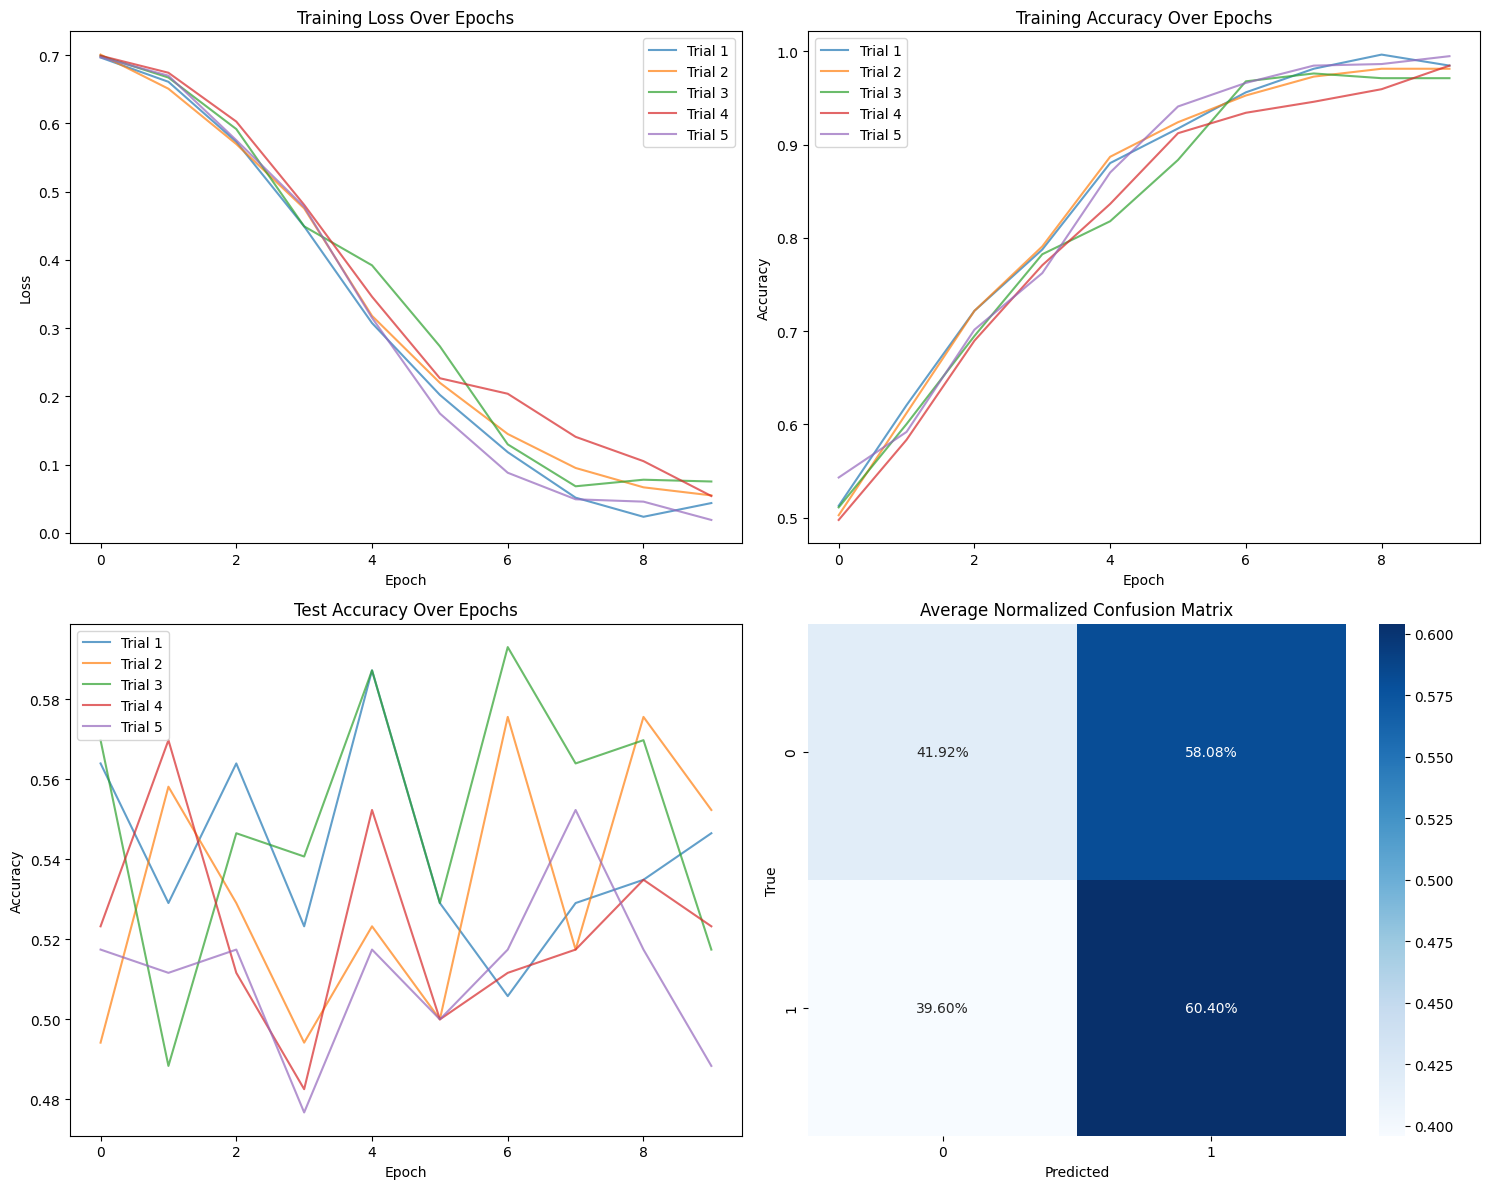


Average Metrics Across All Trials:
                precision  recall  f1-score  support
Non-Entailment      0.437   0.419     0.409     73.0
Entailment          0.589   0.604     0.585     99.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from tqdm import tqdm

def train_model_single_run(model, train_dataloader, test_dataloader, num_epochs, device):
    """Train the model and return metrics for a single run"""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        epoch_correct = 0
        epoch_total = 0

        for batch in train_dataloader:
            turns = batch['turns'].to(device)
            hypothesis = batch['hypothesis'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(turns, hypothesis)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            epoch_correct += (preds == labels).sum().item()
            epoch_total += len(labels)

        # Calculate epoch metrics
        avg_loss = epoch_loss / len(train_dataloader)
        train_accuracy = epoch_correct / epoch_total
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Test phase
        test_accuracy = evaluate_model(model, test_dataloader, device)
        test_accuracies.append(test_accuracy)

    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'final_test_metrics': get_test_metrics(model, test_dataloader, device)
    }

def evaluate_model(model, dataloader, device):
    """Evaluate model and return accuracy"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            turns = batch['turns'].to(device)
            hypothesis = batch['hypothesis'].to(device)
            labels = batch['label'].to(device)

            outputs = model(turns, hypothesis)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += len(labels)

    return correct / total

def get_test_metrics(model, test_dataloader, device):
    """Get detailed test metrics including confusion matrix"""
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_dataloader:
            turns = batch['turns'].to(device)
            hypothesis = batch['hypothesis'].to(device)
            labels = batch['label'].to(device)

            outputs = model(turns, hypothesis)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return {
        'confusion_matrix': confusion_matrix(all_labels, all_preds),
        'classification_report': classification_report(all_labels, all_preds,
                                                    target_names=["Non-Entailment", "Entailment"],
                                                    output_dict=True)
    }

def run_multiple_trials(num_trials, num_epochs, model_class, model_params, train_dataloader,
                       test_dataloader, device):
    """Run multiple trials and collect results"""
    all_results = []

    for trial in tqdm(range(num_trials), desc="Running trials"):
        # Initialize a new model for each trial
        model = model_class(**model_params).to(device)
        results = train_model_single_run(model, train_dataloader, test_dataloader,
                                       num_epochs, device)
        all_results.append(results)

    return all_results

def plot_results(all_results):
    """Create simple line plot visualizations for multiple trials"""
    num_trials = len(all_results)
    num_epochs = len(all_results[0]['train_losses'])

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot each trial separately
    for trial in range(num_trials):
        # Training loss
        axes[0, 0].plot(all_results[trial]['train_losses'],
                       alpha=0.7,
                       label=f'Trial {trial+1}')

        # Training accuracy
        axes[0, 1].plot(all_results[trial]['train_accuracies'],
                       alpha=0.7,
                       label=f'Trial {trial+1}')

        # Test accuracy
        axes[1, 0].plot(all_results[trial]['test_accuracies'],
                       alpha=0.7,
                       label=f'Trial {trial+1}')

    # Set titles and labels
    axes[0, 0].set_title('Training Loss Over Epochs')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()

    axes[0, 1].set_title('Training Accuracy Over Epochs')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()

    axes[1, 0].set_title('Test Accuracy Over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()

    # Average confusion matrix
    avg_conf_matrix = np.mean([result['final_test_metrics']['confusion_matrix']
                              for result in all_results], axis=0)
    sns.heatmap(avg_conf_matrix / np.sum(avg_conf_matrix, axis=1)[:, None],
                annot=True, fmt='.2%', cmap='Blues', ax=axes[1, 1])
    axes[1, 1].set_title('Average Normalized Confusion Matrix')
    axes[1, 1].set_xlabel('Predicted')
    axes[1, 1].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    # Print average metrics
    avg_report = {}
    for metric in all_results[0]['final_test_metrics']['classification_report'].keys():
        if metric not in ['accuracy', 'macro avg', 'weighted avg']:
            values = [result['final_test_metrics']['classification_report'][metric]
                     for result in all_results]
            avg_report[metric] = {
                'precision': np.mean([v['precision'] for v in values]),
                'recall': np.mean([v['recall'] for v in values]),
                'f1-score': np.mean([v['f1-score'] for v in values]),
                'support': values[0]['support']
            }

    print("\nAverage Metrics Across All Trials:")
    print(pd.DataFrame(avg_report).transpose().round(3))

# Example usage:
model_params = {
    'vocab_size': vocab_size,
    'embedding_dim': embedding_dim,
    'word_hidden_size': word_hidden_size,
    'sent_hidden_size': sent_hidden_size,
    'turn_hidden_size': turn_hidden_size,
    'num_classes': num_classes
}

num_trials = 5
num_epochs = 10

results = run_multiple_trials(
    num_trials=num_trials,
    num_epochs=num_epochs,
    model_class=HANModel,
    model_params=model_params,
    train_dataloader=dataloader,
    test_dataloader=test_dataloader,
    device=device
)

plot_results(results)